# The Marine Navigation problem
### by Yunuo DU ([Polytech Nice Sophia, Applied math. dep](http://www.polytech-nice-sophia.fr/formation/ingenieur-mathematiques-appliquees-et-modelisation))

We consider a ship moving in a portion of ocean undergoing a constant current (the whole fluid has constant horizontal velocity $w$) and towing a spread.
The towed streamer is made of $N$ segments of length $\ell$. After some normalisations, the system can be written as follows (see [this paper](http://caillau.perso.math.cnrs.fr/research/cdc-2019b.pdf) for a detailed description of the $N=1$ case):

$$
\left \lbrace
\begin{array}{l}
\dot x = w+\cos\theta,\\
\dot y = \sin\theta,\\
\dot\theta = u,\\
\dot\beta_k = -u-\frac 1l(\prod_{j=1}^{k-1}\cos(\beta_j -\beta_{j-1}))\sin(\beta_k - \beta_{k-1}),\\
\beta_k = \theta_k - \theta, \ \theta_0 = \theta,\\
|u| \le 1, \ 0\le w < 1, \ 0<l<1
\end{array}
\right.
$$

where $\alpha_k:=\theta_k-\theta_{k-1}$ (and $\theta_0:=\theta$). The minimum time problem is considered.

![Thumbnail](thumbnail.png)

[Thumbnail](thumbnail.png)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import os,shutil
#!pygmentize problem.cpp

In [2]:
%matplotlib inline
import bocop
problem_path = "." # using local problem definition
bocop.build(problem_path, clean=0, debug=0, verbose=1) #, cmake_options = '-DCMAKE_CXX_COMPILER=g++')

[EXEC] > ['cmake -DCMAKE_BUILD_TYPE=Release -DPROBLEM_DIR=/net/home/n/np902791/gallery/examples/nav -DCPP_FILE=problem.cpp    /net/home/n/np902791/.conda/envs/ct-gallery/lib/python3.7/site-packages/bocop']
>	-- The C compiler identification is GNU 7.5.0
>	-- The CXX compiler identification is GNU 7.5.0
>	-- Detecting C compiler ABI info
>	-- Detecting C compiler ABI info - done
>	-- Check for working C compiler: /net/home/n/np902791/.conda/envs/ct-gallery/bin/x86_64-conda-linux-gnu-cc - skipped
>	-- Detecting C compile features
>	-- Detecting C compile features - done
>	-- Detecting CXX compiler ABI info
>	-- Detecting CXX compiler ABI info - done
>	-- Check for working CXX compiler: /usr/bin/c++ - skipped
>	-- Detecting CXX compile features
>	-- Detecting CXX compile features - done
>	-- Problem path: /net/home/n/np902791/gallery/examples/nav
>	-- Using CPPAD found at /net/home/n/np902791/.conda/envs/ct-gallery/include/cppad/..
>	-- Using IPOPT found at /net/home/n/np902791/.conda/env

0

iteration 202  objective : -1.3604177943509025e-24


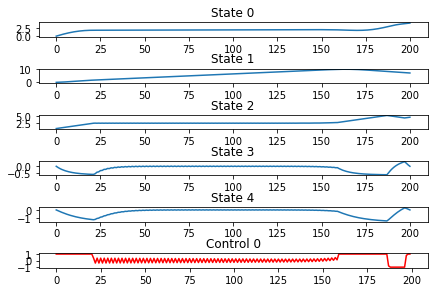

Output(layout=Layout(border='1px solid black'))

Done
Loading solution:  ./problem-Copy3.sol


In [4]:
path_def = './def'
fileList = [ 'problem-Copy1.def', 'problem-Copy2.def', 'problem-Copy3.def' ] #os.listdir(path_def)
solutions = []
for file in fileList:
    if file.endswith('.def'):
        #print('def file: ', file, '\n')
        shutil.copyfile(os.path.join(path_def,file), os.path.join(problem_path,'problem.def'))
        sol_name = file.replace('.def','.sol')
        bocop.run(problem_path, clean=1, graph=2)
        os.rename("problem.sol",sol_name)
        solutions.append(bocop.readSolution(problem_path +'/' + sol_name))

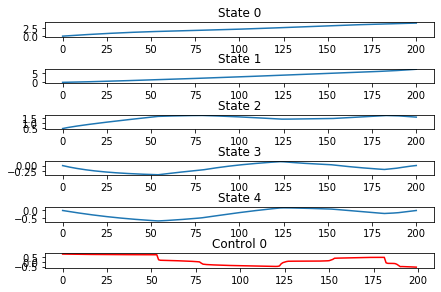

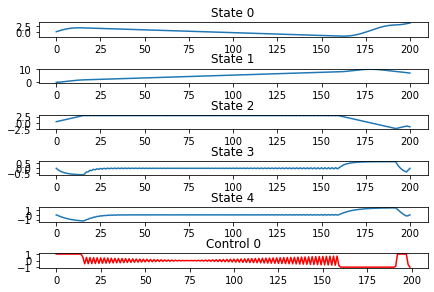

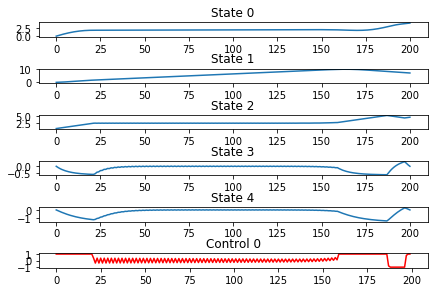

In [5]:
plt.figure(figsize=(15,10)) 
N = np.size(solutions[0].state[0,:])
l = 0.6 # to be retrieved from BOCOP / def files
for s,solution in enumerate(solutions):
    plt.subplot(131+s)
    plt.plot(solution.state[0,:],solution.state[1,:])
    for i in range(0,N,int(N/50)):
        z = np.array([solution.state[0,i],solution.state[1,i]])
        theta = solution.state[2,i]
        beta1,beta2 = solution.state[3,i],solution.state[4,i]
        theta1,theta2 = beta1+theta,beta2+theta
        z1 = z - l*np.array([np.cos(theta1), np.sin(theta1)])
        z2 = z1 - l*np.array([np.cos(theta2), np.sin(theta2)])
        plt.plot([z[0],z1[0]],[z[1],z1[1]],c='black')
        plt.plot([z1[0],z2[0]],[z1[1],z2[1]],c='black')
        plt.scatter(z[0],z[1],c='black')
        plt.scatter(z1[0],z1[1],c='black')
plt.show()

In [6]:
for solution in solutions:
    print('theta_f =', solution.state[2,-1])
    print('tf      =', solution.parameters[0])

theta_f = 1.5707963267949
tf      = 8.89704135640008
theta_f = -1.5707963267949
tf      = 31.8242835449153
theta_f = 4.71238898038469
tf      = 19.0838154403824
